# Применение сингулярного разложения

### Метод svd()

Сингулярное разложение матрицы (далее SVD) реализовано, например, в методе `svd()` пакета `linalg` библиотеки `numpy`. В параметрах метода `svd()` можно указать вид SVD: полное или неполное.

Особенность: формула SVD в слайдах имела вид $A = U \Sigma V^T$ для вещественной матрицы $A$. Метод `svd()` возвращает матрицы $U$, $\Sigma$, $V^T$.
Аналогично метод `svd()` работает и для неполного SVD: формула из слайдов имеет вид $A = U_r S_r V_r^T$, а метод`svd()` возвращает матрицы $U_r$, $S_r$, $V_r^T$.

In [2]:
import numpy as np
X = np.random.rand(5, 3) # некоторая матрица

# полное SVD
U, S, VT = np.linalg.svd(X,full_matrices=True)
print("Полное SVD \n",'U =',U,"\n S = ", S ,"\n V^T = ", VT)

# неполное SVD
Uhat, Shat, VThat = np.linalg.svd(X,full_matrices=False)
print("\nНеполное SVD \n",'U_r =',Uhat,"\n S_r = ", Shat ,"\n V_r^T = ", VThat)

Полное SVD 
 U = [[-0.42104792 -0.13543824  0.74653748  0.25387465 -0.42732258]
 [-0.59754903  0.75917877 -0.15009469 -0.20663563 -0.03682446]
 [-0.48292012 -0.59447217 -0.27195652 -0.56402736 -0.14595814]
 [-0.33253415 -0.16897851 -0.53580673  0.7495165  -0.10956034]
 [-0.34908881 -0.15281743  0.24311349  0.11378724  0.8847215 ]] 
 S =  [1.92060141 0.61088864 0.34425356] 
 V^T =  [[-0.56552494 -0.67080676 -0.47979145]
 [ 0.49275154 -0.74132706  0.45566448]
 [-0.6613452   0.02127165  0.74978   ]]

Неполное SVD 
 U_r = [[-0.42104792 -0.13543824  0.74653748]
 [-0.59754903  0.75917877 -0.15009469]
 [-0.48292012 -0.59447217 -0.27195652]
 [-0.33253415 -0.16897851 -0.53580673]
 [-0.34908881 -0.15281743  0.24311349]] 
 S_r =  [1.92060141 0.61088864 0.34425356] 
 V_r^T =  [[-0.56552494 -0.67080676 -0.47979145]
 [ 0.49275154 -0.74132706  0.45566448]
 [-0.6613452   0.02127165  0.74978   ]]


### Пример

Продемонстрируем идею приближения матрицы с помощью низкоранговой матрицы на примере задачи сжатия изображения.

Обсудим, почему такого типа приближения демонстрируют хороший результат для задачи сжатия изображений. Большие данные часто содержат некоторые закономерности или паттерны, которые могут быть описаны с помощью низкоранговых представлений. Изображения являются простейшей иллюстрацией этой встроенной сжимаемости данных. Изображение в серых тонах и представляет собой матрицу. Существуют различные пространства для представления изображения: пространство значений пикселей в том или ином цветовом пространстве (например RGB), представление изображения в частотной области, представление изображения с помощью всплесков или на основе SVD. И в тех или иных пространствах можно добиться сильных коэффициентов сжатия без больших визуальных потерь. 

Загрузим изображение, это матрица $A$, проведём SVD и выведем график сингулярных значений. Кроме того, для различных значений индекса $r$, отсекающего ненулевые сигнулярные значения от обнуляемых, выведем изображения-приближения $A_{approx}$.

При $r=100$ восстановленное изображение довольно точно, сумма оставшихся сингулярных значений составляет почти 80% от общей суммы всех сингулярных значений. При этом MSE ошибка менее 2% в обычной евклидовой норме. 

От полных матриц $U,V$ из SVD разложения для приближения при $r=100$ надо сохранить только 100 столбцов.

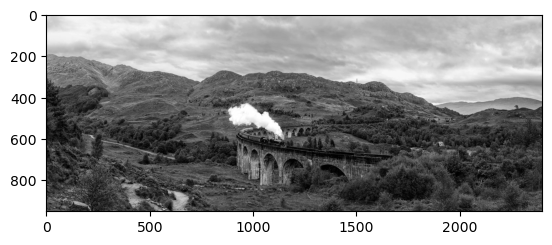

In [11]:
# Загрузка изображения
from matplotlib.image import imread
import matplotlib.pyplot as plt
im = imread('source/test_im2.jpg')
A = np.mean(im, -1); # Перевод из RGB в серые тона
plt.imshow(A, cmap = 'gray')

# неполное SVD
U, S, VT = np.linalg.svd(A,full_matrices=False)

Построим приближение матрицы $A$ с изображением с помощью низкоранговой матрицы для нескольких рангов ($r=5$, $r=20$, $r=100$), используя для этого сокращённое SVD.

In [12]:
# значения 5-го, 20-го, 100-го сингулярных чисел 
[S[r] for r in (5, 20, 100)]

[10933.445493268924, 4359.516253475035, 1798.629783420455]

In [13]:
S = np.diag(S)
S.shape

(950, 950)

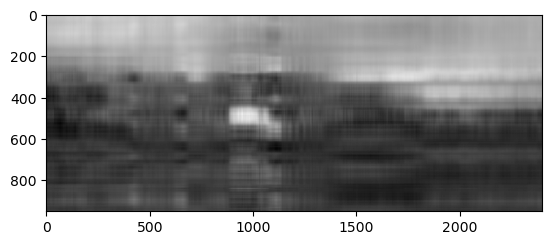

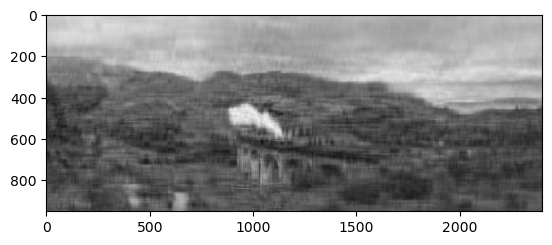

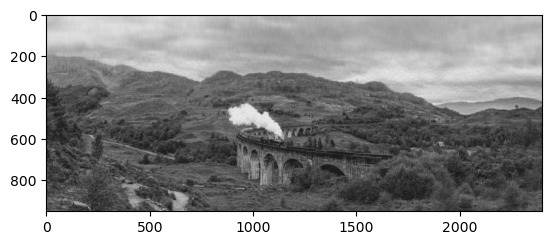

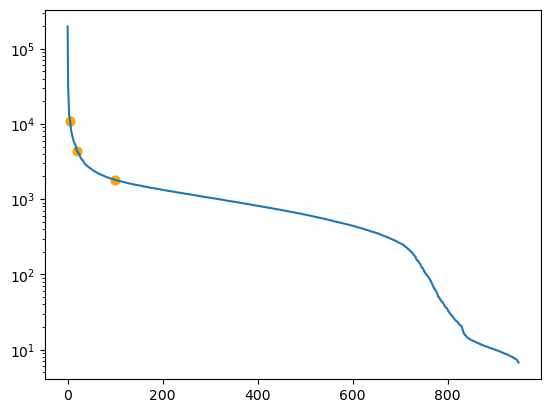

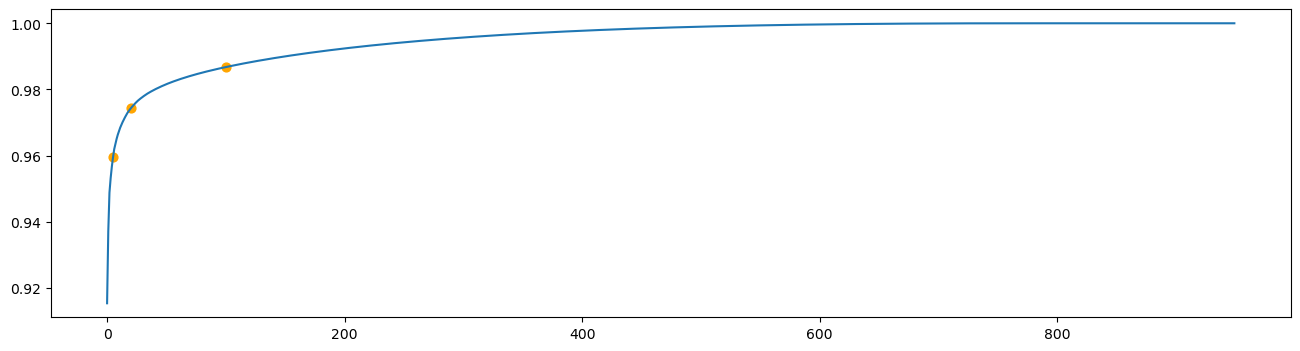

In [14]:
# Строим приближения на основе сокращённого SVD и выведем их на экран
for r in (5, 20, 100): 
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    img = plt.imshow(Xapprox, cmap = 'gray')
    plt.show()
    
# Построим график сингулярных значений 
# лог-масштаб по оси Oy
plt.semilogy(np.diag(S))
singular = np.diag(S)
plt.scatter([5,20,100],[singular[r] for r in (5, 20, 100)], color='orange', s=40, marker='o')

# Построим график роста доли нормы Фробениуса низкорангового приближения к норме всей матрицы 
plt.figure(figsize = (16,4))
fractions = np.cumsum(np.diag(S)**2)/np.sum(np.diag(S)**2)
plt.plot(fractions)
plt.scatter([5,20,100],[fractions[r] for r in (5, 20, 100)], color='orange', s=40, marker='o')

Точками отмечены значения для $r=5,20,100$.

### Пример работы метода PCA

Рассмотрим набор медицинских данных, связанных с заболевании раком. См. статью:
S. Raychaudhuri, J. M. Stuart, and R. B. Altman. Principal components analysis to summarize microarray experiments: application to sporulation time series. In Pacific Symposium on Biocomputing 2000, pages 455–466. World Scientific, 2000.

Этот пример, иллюстрирующий преимущества PCA. 

Данные содержат информацию по 216 пациентам, из которых у 121 наблюдается рак, а у 95 - нет. Для каждого пациента вектор данных содержит информацию о 4000 генах. У такого типа данных высокая размерность. Однако на графике сингулярных чисел ясно, что в первых нескольких главных компонентах содержится большая часть информации об изменчивости данных. Иными словами, данные о генах сильно коррелируют. Возможность визуализировать простые закономерности и корреляции в данных большой размерности является важной полезной особенностью PCA. Поэтому метод PCA широко используется для поиска закономерностей в многомерных медицинских и генетических данных.

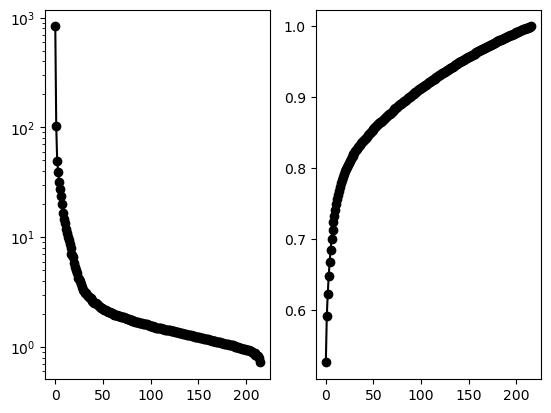

In [7]:
import matplotlib.pyplot as plt
import numpy as np

obs = np.loadtxt('source/ovariancancer_obs.csv',delimiter=',')

f = open('source/ovariancancer_grp.csv', "r")
grp = f.read().split("\n")

U, S, VT = np.linalg.svd(obs,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')

plt.show()

Рассмотрим представление данных в первых трёх главных компонентах в соответствие с формулой из лекций $Y_3 =  A V_3$. Получившиеся коэффициенты можно визуализировать на трёхмерном графике.

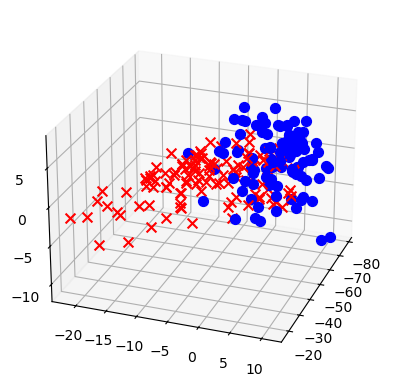

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Y = obs @ VT.T

for j in range(obs.shape[0]):
    
    if grp[j] == 'Cancer':
        ax.scatter(Y[j,0],Y[j,1],Y[j,2],marker='x',color='r',s=50)
    else:
        ax.scatter(Y[j,0],Y[j,1],Y[j,2],marker='o',color='b',s=50)
ax.view_init(25,20)
plt.show()

Из графика можно отметить, что пациенты с раком в целом группируются отдельно от пациентов без рака при построении графика точек в подпространстве, где базисом являют тре первых главных компоненты PCA. 

Эта способность метода PCA кластеризовывать данные по категориям полезна в применении к задачам машинного обучения и распознавании образов.

Аналогичный график для двух главных компонент.

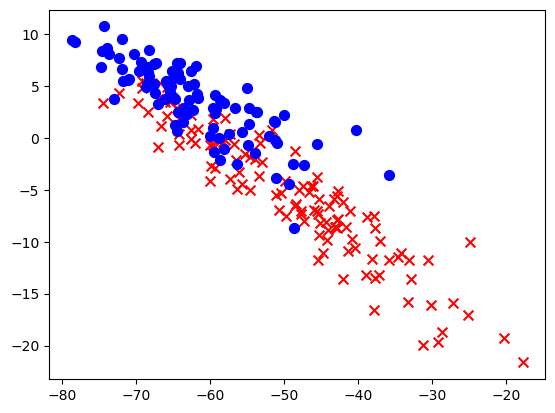

In [15]:
fig = plt.figure()
Y = obs @ VT.T

for j in range(obs.shape[0]):
    
    if grp[j] == 'Cancer':
        plt.scatter(Y[j,0],Y[j,1],marker='x',color='r',s=50)
    else:
        plt.scatter(Y[j,0],Y[j,1],marker='o',color='b',s=50)


### PCA для фотографий людей

Применим метод PCA для получения набора "собственных лиц" из большой базы фотографий. Суть в том, чтобы из большой библиотеки изображений лиц извлечь наиболее значимые корреляции между изображениями. Результатом PCA будет набор главных компонент в виде "собственных лиц", задающих новую систему координат.  Фото любого другого лица из базы данных может быть представлено в этих координатах с помощью коэффициентов, полученных скалярным произведением этого фото с каждой из главных компонент. 

Известно, что фотографии одного и того же человека, как правило, группируюся в этом подпространстве, порождённом "собственными лицами", что делает это преобразование полезным для распознавания и классификации лиц. 

В качестве примера используем расширенную базу данных лиц Йельского университета, состоящую из обрезанных и выровненных изображений 38 человек (28 из расширенной базы данных и 10 из исходной базы данных) и 64 условиях освещения. Каждое изображение имеет высоту 192 пикселя и ширину 168 пикселей. Для применения метода PCA изображения преобразованы в вектор-столбец с 192 × 168 = 32 256 элементами. 

Для обучающих данных используем первые 36 человек в базе данных. Прочих двух оставим для тестового набора данных.

In [130]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io

Скачать датасет можно тут:
https://www.kaggle.com/datasets/tbourton/extyalebcroppedpng/code?datasetId=1288118

Однако, датасет невполне подготовлен, не для каждого лица есть полный набор из 64 фотографий.

In [131]:
def specNumber(i):
    if i<10:
        return "0"+str(i)
    else:
        return str(i)

dict = {}
count=0

import os
# проверка комплектности фотографий  
for i in range(1,40):
    prefixed = [filename for filename in os.listdir('source/CroppedYalePNG') if filename.startswith("yaleB"+specNumber(i))]
    if len(prefixed) != 64:
        dict[i] = len(prefixed)
    count += len(prefixed)

# индексы лиц с неполным комплектом фотографий
print(dict)
# общее число фотографий
print(count)

{11: 60, 12: 59, 13: 60, 14: 0, 15: 63, 16: 62, 17: 63, 18: 63}
2414


In [132]:
import os
# подгрузка 36 лиц (индекс 14 пропущен)
image = np.zeros((36,192,168))
idx=0
for i in range(1,38):
    if i == 14:
        continue
    image[idx,:,:] = plt.imread('source/CroppedYalePNG/yaleB'+specNumber(i)+"_P00A+000E+00.png")
    idx +=1

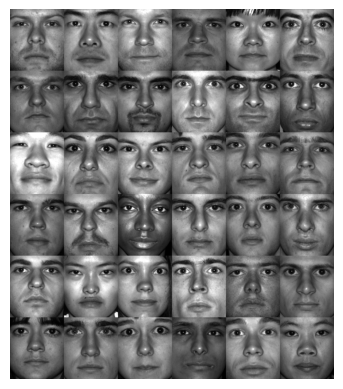

In [133]:
n=192
m=168
allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = image[count,:,:]
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Пример 64 изображений одного конкретного человека представлен ниже. 

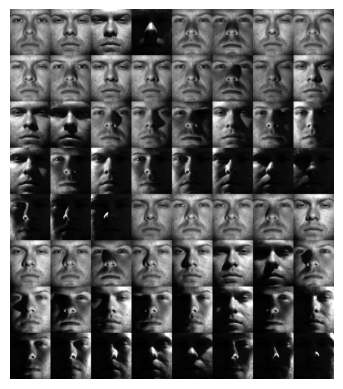

In [134]:
imageSingle = np.zeros((64,192,168))
idx=0

prefixed = [filename for filename in os.listdir('source/CroppedYalePNG') if filename.startswith("yaleB"+specNumber(1))]
for fname in prefixed:
    imageSingle[idx,:,:] = plt.imread('source/CroppedYalePNG/'+fname)
    idx +=1
    

n=192
m=168
onePerson = np.zeros((n*8,m*8))
count = 0

for j in range(8):
    for k in range(8):
        onePerson[j*n : (j+1)*n, k*m : (k+1)*m] = imageSingle[count,:,:]
        count += 1
        
img = plt.imshow(onePerson)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [16]:
# Формируем обучающий датасет
numFiles = 2414  # общее число фотографий, найдено выше
numTrain = numFiles-2*64 # число фотографий для обучающего датасета
dataset = np.zeros((numTrain, 192*168))
count = 0

for i in range(1,38):
    prefixed = [filename for filename in os.listdir('source/CroppedYalePNG') if filename.startswith("yaleB"+specNumber(i))]
    for fname in prefixed:
        im = plt.imread('source/CroppedYalePNG/'+fname)
        dataset[count,:] = np.reshape(im,-1)
        count +=1

dataset.shape

(2286, 32256)

In [17]:
# Формируем тестовый датасет
numTest = 2*64
datasetTest = np.zeros((numTest, 192*168))
count = 0

for i in range(38,40):
    prefixed = [filename for filename in os.listdir('source/CroppedYalePNG') if filename.startswith("yaleB"+specNumber(i))]
    for fname in prefixed:
        im = plt.imread('source/CroppedYalePNG/'+fname)
        datasetTest[count,:] = np.reshape(im,-1)
        count +=1

datasetTest.shape

(128, 32256)

В датасет мы записывали по строкам изображения, вытянутые в длинный вектор. Сформируем усреднённой лицо.

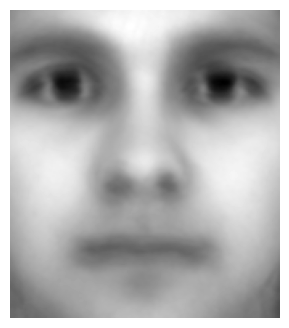

In [18]:
avgFace = np.mean(dataset,axis=0) 

plt.figure(figsize=(4,4))
img = plt.imshow(np.reshape(avgFace,(n,m)))
img.set_cmap('gray')
plt.axis('off')
plt.show()

Вычтем усреднённое лицо из датасета лиц.

In [19]:
X = dataset - np.tile(avgFace,(dataset.shape[0],1))

Считаем SVD

In [20]:
U, S, VT = np.linalg.svd(X,full_matrices=0)

In [23]:
VT.shape

(2286, 32256)

Столбцы матрицы $V$ являются правыми сингулярными векторами. Первый вектор, это тот, вдоль направления которого смотрит наибольшая часть векторов. В этом смысле там должны улавливаться наиболее типичные черты лиц. Это и будет первое "собственное лицо".

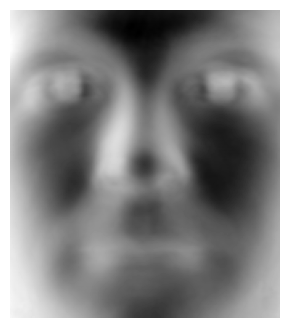

In [21]:
plt.figure(figsize=(4,4))
img_u1 = plt.imshow(np.reshape(VT[0,:],(n,m)))
img_u1.set_cmap('gray')
plt.axis('off')
plt.show()

Используя найденную библиотеку собственных лиц в матрице $V$, сформируем изображение, которого не было в обучающих данных. Фотографии двух человек были выделены в тестовый набор данных. Используем одно из изображений в качестве тестового изображения `xtest`. 

Рассмотрим приближение этого изображения с помощью подпространства найденных собственных лиц для различных размерностей $d$ этого подпространства. Формула для приближения имеет вид
$$
x_{test}^{app} \approx x_{test} V_d V_d^*
$$

Ниже построены приближения для различных $d$. При $d ≤ 200$ приближение имеет доволно низкое качество, но при при $d > 400$ оно визуально близко к тестовому изображению.

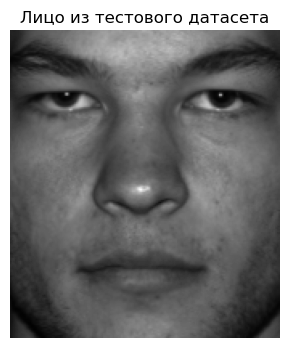

In [22]:
testFace = datasetTest[0,:]

plt.figure(figsize=(4,4))
plt.imshow(np.reshape(testFace,(n,m)))
plt.set_cmap('gray')
plt.title('Лицо из тестового датасета')
plt.axis('off')
plt.show()

(-0.5, 167.5, 191.5, -0.5)

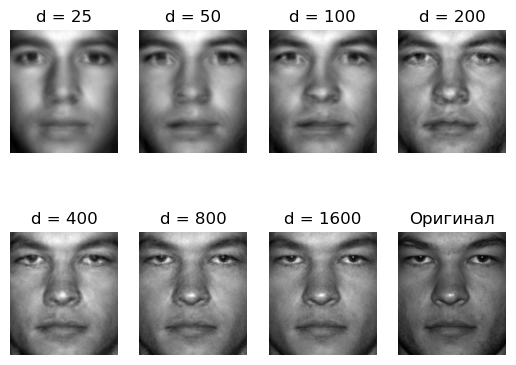

In [23]:
testFaceMS = testFace - avgFace
d_list = [25, 50, 100, 200, 400, 800, 1600]
V=VT.T
idx=1

for d in d_list:
    reconFace = avgFace + testFaceMS @ V[:,:d]  @ V[:,:d].T 
    plt.subplot(2,4,idx)
    img = plt.imshow(np.reshape(reconFace,(n,m)))
    img.set_cmap('gray')
    plt.title('d = ' + str(d))
    plt.axis('off')
    idx +=1
    
plt.subplot(2,4,8)
plt.imshow(np.reshape(testFace,(n,m)))
plt.set_cmap('gray')
plt.title('Оригинал')
plt.axis('off')

На самом деле, полученное подпространство собственных лиц  можно использовать и для приближения иных ихображений, например изображение собаки или чашки, или др. Это возможно по той причине, что вектора-столбцы матрицы $V$ охватывают довольно большое подпространство 32256-мерного пространства изображений размера 192 на 168, эти вектора захватывают многие особенности характерные для осмысленных изображений.

In [25]:
from skimage.color import rgb2gray

testDog = rgb2gray(plt.imread("source/dog.jpg"))
testDog = np.reshape(testDog,-1)

(-0.5, 167.5, 191.5, -0.5)

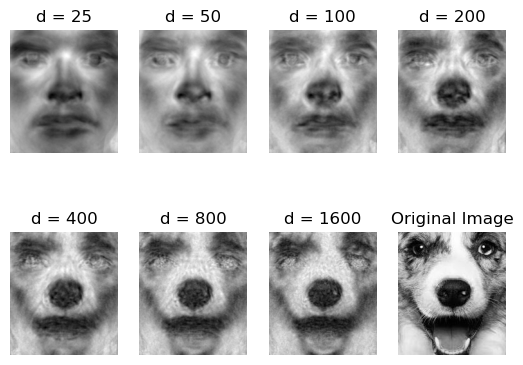

In [26]:
testFaceMS = testDog - avgFace
d_list = [25, 50, 100, 200, 400, 800, 1600]
V=VT.T
idx=1

for d in d_list:
    reconFace = avgFace + testFaceMS @ V[:,:d]  @ V[:,:d].T 
    plt.subplot(2,4,idx)
    img = plt.imshow(np.reshape(reconFace,(n,m)))
    img.set_cmap('gray')
    plt.title('d = ' + str(d))
    plt.axis('off')
    idx +=1
    
plt.subplot(2,4,8)
plt.imshow(np.reshape(testDog,(n,m)))
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')

Рассмотрим использование собственных лиц в качестве системы координат для соответствующего подпространства (порождённого столбцами матрицы $V$). Проецируя изображение $x$ на первые $d$ PCA
компонент, получим набор координат в этом пространстве: $\tilde x = x V_d$. 
Некоторые компоненты могут отражать наиболее общие черты, присущие всем лицам.
Другие компоненты будут более полезны для различения лиц. Дополнительные компоненты могут отвечать за влияние углов освещения. 

На графике ниже показаны координаты всех 64 изображений для лиц двух человек, которые спроецированы на подпространсво, порождённое 5-ой и 6-ой главными компонентами. В целом эти координаты позволяют хорошо разделить лиц этих двух человек. Это наблюдения являются основанием для применения метода PCA как составной части некоторых алгоритмов распознавания и классификации изображений.

In [32]:
Person3 = np.zeros((64, 192*168))
Person5 = np.zeros((64, 192*168))
count = 0

prefixed = [filename for filename in os.listdir('source/CroppedYalePNG') if filename.startswith("yaleB"+specNumber(3))]
for fname in prefixed:
    im = plt.imread('source/CroppedYalePNG/'+fname)
    Person3[count,:] = np.reshape(im,-1)
    count +=1

count = 0
prefixed = [filename for filename in os.listdir('source/CroppedYalePNG') if filename.startswith("yaleB"+specNumber(5))]
for fname in prefixed:
    im = plt.imread('source/CroppedYalePNG/'+fname)
    Person5[count,:] = np.reshape(im,-1)
    count +=1    

Проекция всех изображений двух человек на 5-е и 6-е компоненты PCA. Проецируемые изображения первого человека обозначены черными ромбами, а проецируемые изображения второго человека обозначены красными треугольниками. 

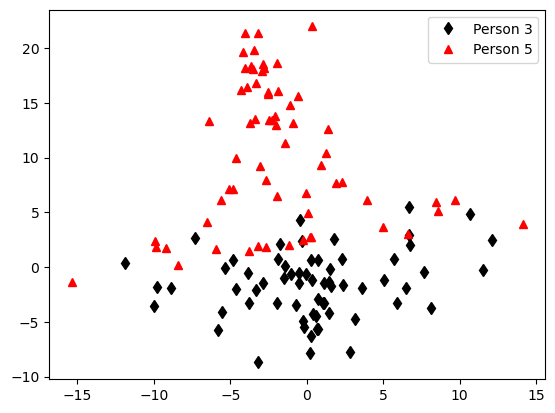

In [33]:
Person3 = Person3 - np.tile(avgFace,(Person3.shape[0],1))
Person5 = Person5 - np.tile(avgFace,(Person5.shape[0],1))

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = Person3 @ V[:,PCAmodes-np.ones_like(PCAmodes)]
PCACoordsP2 = Person5 @ V[:,PCAmodes-np.ones_like(PCAmodes)] 

plt.plot(PCACoordsP1[:,0],PCACoordsP1[:,1],'d',color='k',label='Лицо 3')
plt.plot(PCACoordsP2[:,0],PCACoordsP2[:,1],'^',color='r',label='Лицо 5')

plt.legend()
plt.show()

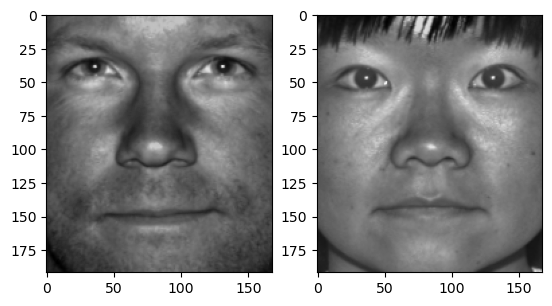

In [37]:
plt.subplot(121)
plt.imshow(np.reshape(Person3[0],(n,m)))
plt.subplot(122)
plt.imshow(np.reshape(Person5[0],(n,m)))

# Пример о выравнивании данных

Обсудим на примере одну из проблем SVD, связанной с необходимостью пред-обрабатывать данные перед SVD. Следующий пример иллюстрирует эту проблему при применении SVD для снижения размерности данных и извлечения важных особенностей из данных.

Суть примера: матрица данных состоит из 0 и 1, визуально это квадрат на черном фоне. Стороны квадрата параллельны осям. В этом случае SVD имеет простой вид с только одним ненулевым сингулярным значением и сингулярными векторами, определяющими ширину и высоту прямоугольника.

Если же квадрат вращать, то стороны находятся под углом к осям. И в SVD это будет проявляться в увеличенном наборе ненулевых сингулярных чисел.

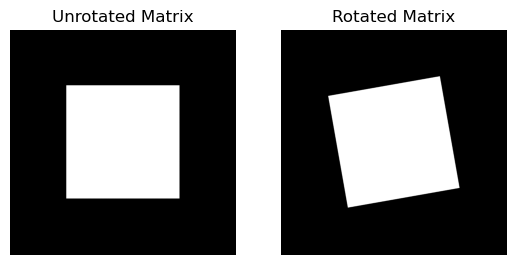

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage 

n = 1000
q = int(n/4)
X = np.zeros((n,n))
X[(q-1):(3*q),(q-1):(3*q)] = 1


X_angle = skimage.transform.rotate(X,10)
X_angle[np.nonzero(X_angle)] = 1

plt.subplot(121)
plt.imshow(X)
plt.set_cmap('gray')
plt.axis('off')
plt.title('Unrotated Matrix')

plt.subplot(122)
plt.imshow(X_angle)
plt.set_cmap('gray')
plt.axis('off')
plt.title('Rotated Matrix')
plt.show()


In [3]:
S

array([5.01000000e+02, 2.02288883e-12, 1.32594554e-12, 1.27541488e-12,
       8.37878591e-13, 6.69073720e-13, 4.11554541e-13, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
       5.00099712e-14, 5.00099712e-14, 5.00099712e-14, 5.00099712e-14,
      

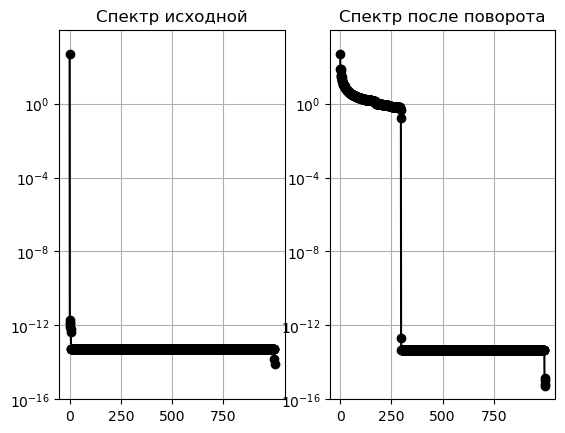

In [2]:
U, S, VT = np.linalg.svd(X,full_matrices=0)
U_angle, S_angle, VT_angle = np.linalg.svd(X_angle,full_matrices=0)

plt.subplot(121)
plt.semilogy(S,'-o',color='k')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.title('Спектр исходной')


plt.subplot(122)
plt.semilogy(S_angle,'-o',color='k')
plt.ylim((10**(-16),10**(4)+1))
plt.yticks(np.power(10,np.arange(-16,4,4, dtype=float)))
plt.xticks(np.arange(0,1000,250))
plt.grid()
plt.title('Спектр после поворота')
plt.show()


Исходный квадрат можно восстановить по одной главной компоненте. А для повёрнутого квадрата надо более 200 главных компонент.

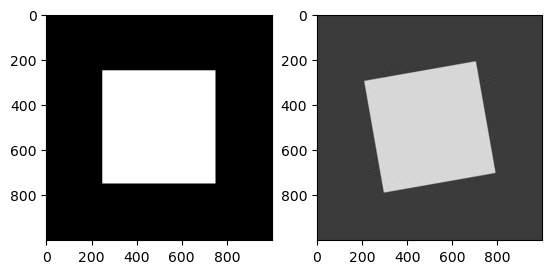

In [7]:
r=1
Sr = np.diag(S)
approx = U[:,:r] @ Sr[0:r,:r] @ VT[:r,:]
plt.subplot(121)
plt.imshow(approx, cmap='grey')

r=50
Sr_angle = np.diag(S_angle)
approx2 = U_angle[:,:r] @ Sr_angle[0:r,:r] @ VT_angle[:r,:]
plt.subplot(122)
plt.imshow(approx2, cmap='grey')

Суть такого поведения в том, что SVD очень зависит от той координатной системы, в которой представлены данные. 
В частности ранг SVD сильно увеличивается, когда измерения объектов сдвигаются, вращаются, растягиваются. То есть SVD без пред-обработки может показать плохой результат.

В примере выше о собственных лицах данные были специально обрезаны, центрированы и выровнены. Без этой пред-обработки, указанные выше результаты были бы хуже.

Проследим также изменения от поворота на 12 разных углах.

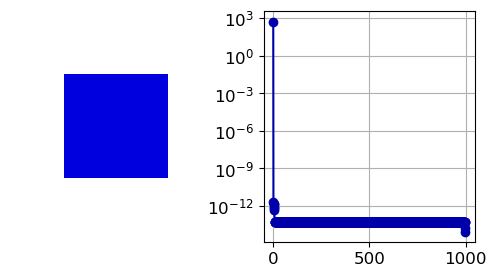

In [149]:
import matplotlib.pyplot as plt
import matplotlib.cm
import numpy as np
import skimage.transform

plt.rcParams['figure.figsize'] = [6,3]
plt.rcParams.update({'font.size': 12})

n = 1000
q = int(n/4)
X = np.zeros((n,n))
X[(q-1):(3*q),(q-1):(3*q)] = 1

nAngles = 12 # Sweep through 12 different angles, from 0:4:44 degrees
cm_np = np.array([[0,0,2/3],
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])


cmap = plt.cm.jet
cmap.set_bad(alpha = 0.0)

U, S, VT = np.linalg.svd(X,full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
plt.imshow(np.ma.masked_where(X == 0, X),vmin=0,vmax=nAngles)
plt.set_cmap(cmap)
plt.axis('off')


ax2 = fig1.add_subplot(122)
plt.semilogy(S,'-o',color=tuple(cm_np[0]))
plt.grid()

plt.show()

C:\Users\AlexK\AppData\Local\Temp\ipykernel_13940\768308675.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[1].axis('on')


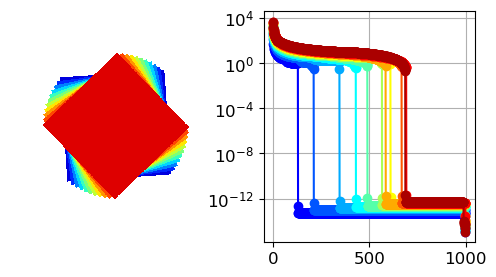

In [150]:
Xrot = X

fig, axs = plt.subplots(1,2)

for j in range(nAngles):
    Xrot = skimage.transform.rotate(X,j*4) #rotate by theta = j*4 degrees
    Xrot[np.nonzero(Xrot)] = j
    
    U, S, VT = np.linalg.svd(Xrot)

    axs[0].imshow(np.ma.masked_where(Xrot == 0, Xrot),vmin=0,vmax=nAngles)
    plt.set_cmap(cmap)
    axs[0].axis('off')

    axs[1].semilogy(S,'-o',color=tuple(cm_np[j]))
    axs[1].axis('on')
    axs[1].grid(1)

plt.show()

### Пример о цифрах

Рассмотрим датасет о цифрах

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X, Y = digits.data, digits.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 42)

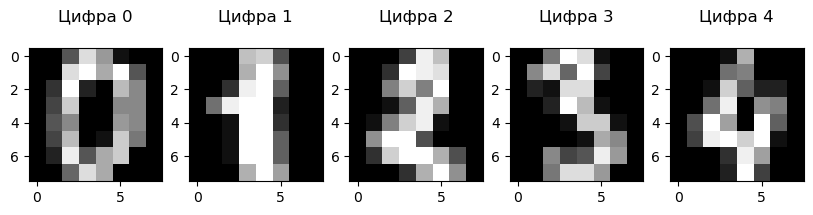

In [4]:
plt.figure(figsize=(10,4))
for index, (image, label) in enumerate(zip(X[0:5], Y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Цифра %i\n' % label, fontsize = 12)

In [6]:
X_train.shape

(1437, 64)

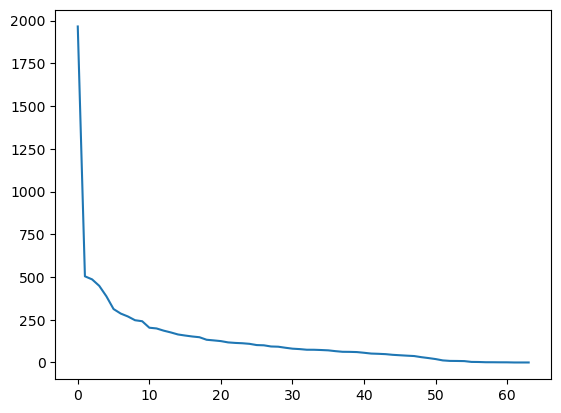

In [10]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=64)
X_new = svd.fit_transform(X_train)

plt.plot(svd.singular_values_)

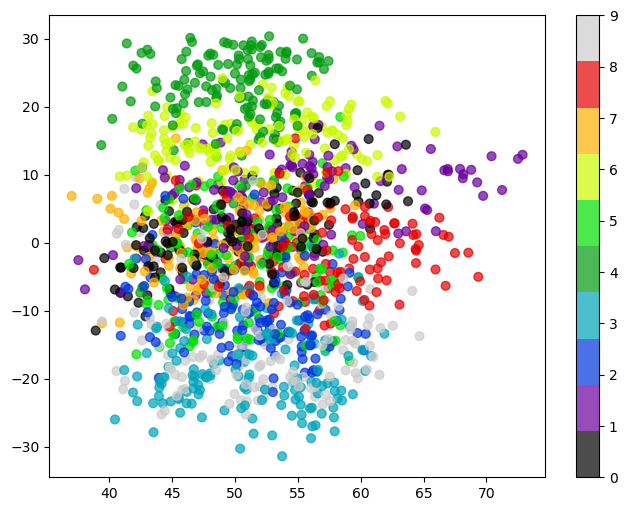

In [12]:
# визуализируем обучающий датасет 
plt.figure(figsize=(8,6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=Y_train, 
            alpha=0.7, s=40,
            cmap=plt.get_cmap('nipy_spectral', 10))
plt.colorbar()

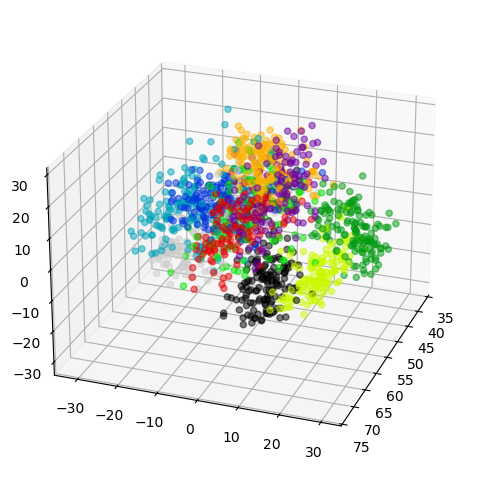

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c = Y_train, 
           alpha = 0.5, cmap=plt.get_cmap('nipy_spectral', 10))
ax.view_init(25,20)
plt.show()

### Задача:

С матрицей `X_train` провести обучение классификатора kNN (k-ближайших соседей) с параметром числа соседей $k=5$. Проверить работу классификатора на  `X_test`. Оценить качество `score1` с помощью `knn.score()`.

С помощью SVD снизить размерность пространства признаков в матрице `X_train` до размерности $d$ для различных $d$. С полученной матрицей провести обучение классификатора kNN с параметром числа соседей $k=5$. Проверить работу классификатора на матрице `X_test` со сниженной размерностью. Оценить качество `score2` с помощью `knn.score()`.

Цель: найти минимальное значение размерности $d$, при котором падение качества обученной модели по сравнению с `score1` составляет менее 1%.